In [285]:
import numpy as np
import matplotlib.pyplot as plt

In [286]:
import numpy as np
import matplotlib.pyplot as plt

In [287]:
import os
import shutil
import time

In [288]:
dir_save = "../../.saves/" + "T=100 A=0.2 Cave=1 from tanh/" 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


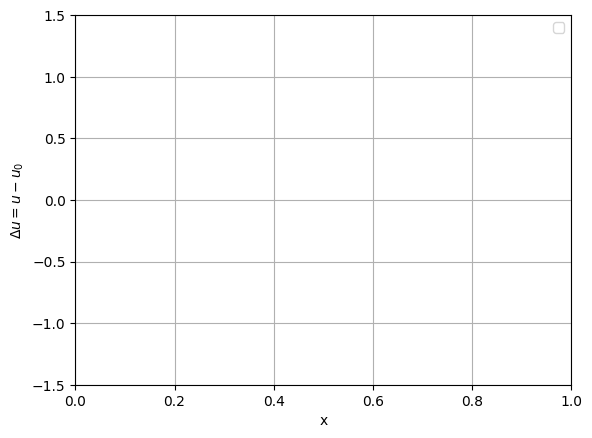

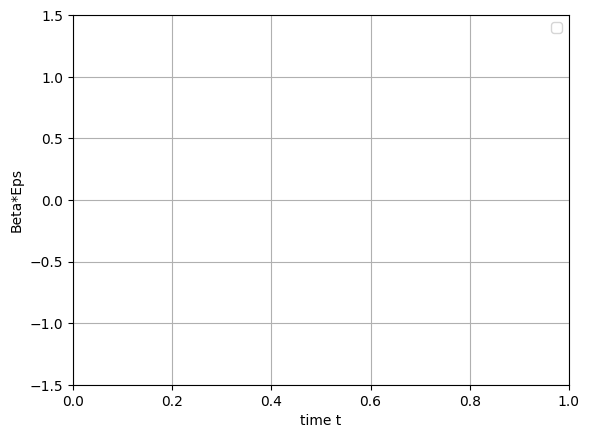

In [289]:
#title = "$C(t) = 1 + 0.2\sin(2\pi t/T)$\n $T = 100 \eps = 2\pi/T$\n $u = \sqrt{C}u_{k_0}(\sqrt{C/2}x) + \eps u_1 + ...$ \n"

# Create plot object for distance from the stationary state
fig_d, ax_d = plt.subplots()
ax_d.set_xscale("linear")
ax_d.set_xlabel("x")
ax_d.set_ylabel("$\Delta u = u - u_0$")
ax_d.set_yscale("linear")
ax_d.set_ylim(-1.5,1.5)
ax_d.legend()
ax_d.grid()

# Create plot object for extimations of beta1
fig_b, ax_b = plt.subplots()
ax_b.set_xscale("linear")
ax_b.set_xlabel("time t")
ax_b.set_ylabel("Beta*Eps")
ax_b.set_yscale("linear")
ax_b.set_ylim(-1.5,1.5)
ax_b.legend()
ax_b.grid()

#ax_d.set_title(title)
#ax_b.set_title(title)

1.4158804924724322e-05
0.0060023080563849085
0.005777033484512195
0.005378956188118789
0.004928257991637874
0.004436916844062999
0.003913675778688841
0.0033658467396535663
0.0027994781884972397
0.0022195305769727725
0.001630066832838395
0.0010344470392280591
0.0004355211339763798
-0.0001641829927767624
-0.0007622762774106562
-0.0013563290640119519
-0.0019436939009080945
-0.002521329193029498
-0.0030856232938334394
-0.0036322203196665903
-0.004155851507654962
-0.004650179416313183
-0.005107666748104034
-0.00551948700653071
-0.005875500314329596
-0.00616432387542698
-0.006373531604051852
-0.006490019559601157
-0.006500570545634021
-0.006392639645079967
-0.006155359828109885
-0.0057807316036808665
520.0


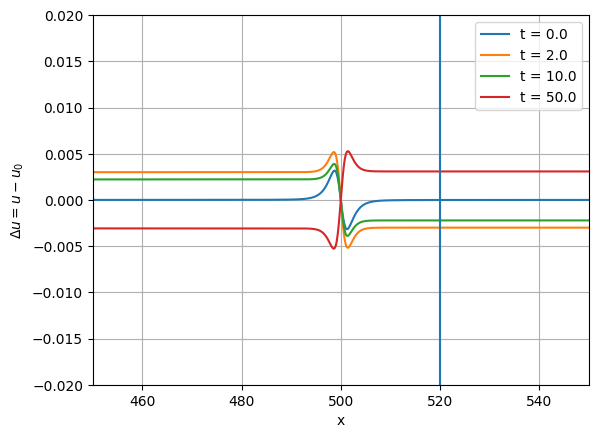

In [290]:
# Select the plot xspan
xmin = 46
xmax = 56

ts = [] # Instants t of the plots
beta1s_eps = []     # beta1*eps

# Parameters for beta1 extimation
dx = 0.1
L = 1000
xplateau = L/2 + 20
iplateau = int(xplateau/dx)

plot_list = [0, 2, 10, 50]

for folder in sorted(os.listdir(dir_save), reverse=False):
    dir = dir_save + folder
    #print(dir)

    f = open(dir + "/tdgl_result.dat", "r")
    N = 1000000000
    i = 0
    for row in f:
        if i != 0:
            a, b = row.split(" ")
            x[i-1] = float(a)
            y[i-1] = float(b)
        else:
            N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
            N = int(N)
            x = np.zeros(N)
            y = np.zeros(N)
            tmax = float(tmax)
            dx = float(dx)
            L = N*dx
            dt = float(dt)
            A = float(A)
            #print(Thalf)
            T = 2*float(Thalf)
            Cave = float(Cave)
        i = i + 1

    #x = x[0:i]
    f.close()
    
    # Label with the state's time
    state_time = tmax 
    state_time = round(state_time, 3)
    labell = "t = " + str(state_time) # Label with time (uncomment for custom label)
    # Get custom label of the curve (use it only if it is not empty)
    f = open(dir + "/label.dat", "r")
    label = f.readline().strip('\n')
    f.close()
    if label != "":
        labell = label
    
    # Get last value of C (C at the time of the plotted state)
    f = open(dir + "/fileCout.dat", "r")
    for row in f:
        tt, C = row.split(" ") #Only the last row is interesting
    C = float(C)

    y_stat_state = np.sqrt(C)*np.tanh((x-L/2*np.ones(N))*np.sqrt(C/2))
    deviation = y - y_stat_state
    # Deviation from stationary state
    if plot_list.__contains__(tmax) and np.abs(C) > 1e-5:   # If C=0 then the rescaled width is infinite!
        ax_d.plot(x, deviation, label = "t = " + str(round(tmax,2)))
    # Measure beta_1
    beta1s_eps.append(deviation[iplateau]*(-2))
    ts.append(state_time)
    print(deviation[iplateau]*(-2))
    

print(xplateau)
ax_d.axvline(xplateau)
#eps = 0.5
#plt.ylim(-1-eps,1+eps)
    
ax_d.legend()
xspan = 100
xmin = L/2 - xspan/2
xmax = L/2 + xspan/2
ax_d.set_xlim(xmin, xmax)
ax_d.set_ylim(-0.02,0.02)
fig_d

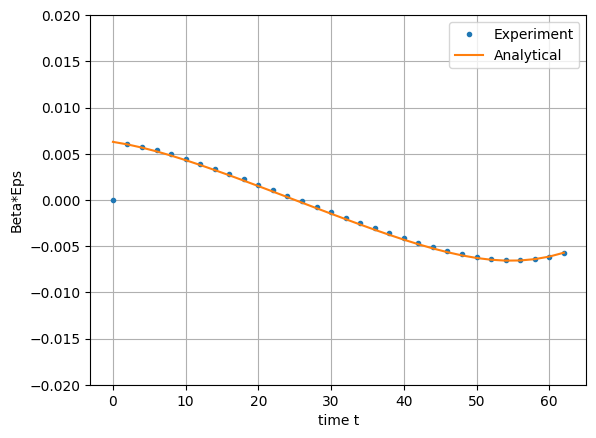

In [291]:
ax_b.plot(ts, beta1s_eps, ".", label = "Experiment")
# Analytical expression for beta1
A = 0.2
T = 100
eps = 2*np.pi/T
beta1s_eps_anal = np.zeros(len(ts))
for i in np.arange(0, len(ts)):
    beta1s_eps_anal[i] = 0.5*eps*A*np.cos(eps*ts[i])/((1+A*np.sin(eps*ts[i]))**(3/2))
ax_b.plot(ts, beta1s_eps_anal, label="Analytical")

ax_b.set_ylim(-0.02, 0.02)
ax_b.legend()

fig_b